In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

In [9]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [13]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(np.linspace(0, 10, len(Data[:, 0])))
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [14]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 0.6 
n_lin_guess = 21e-7
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 0.7
n_quad_guess = 21e-7
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
C:\Users\hanse\AppData\Local\Temp\ipykernel_12528\2282697257.py:46: SyntaxWarning: invalid escape sequence '\p'
  print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
C:\Users\hanse\AppData\Local\Temp\ipykernel_12528\2282697257.py:47: SyntaxWarning: invalid escape sequence '\p'
  print("n:", popt_1[1], '$\pm$', lin_err[1])
C:\Users\hanse\AppData\Local\Temp\ipykernel_12528\2282697257.py:50: SyntaxWarning: invalid escape sequence '\p'
  print("Offset:", popt_1[2], '$\pm$', lin_err[2])


Linear Parameters:
Amplitude: 0.0023783361090582824 $\pm$ 0.005320376232252306
n: 1.9703317721000685e-06 $\pm$ 2.9685092258377926e-07
Offset: 14.007535587267851 $\pm$ 0.0037620579187679533

Quadratic Parameters:
Amplitude: 0.03136925500867244 +/- [0]
n: 2.0874643787339884e-06 +/- 3.0484039503900896e-09
Offset: 14.007324563041477 +/- 0.0037622891564747015
m: -8.011656583532578e-09 +/- 6.783965751976461e-09


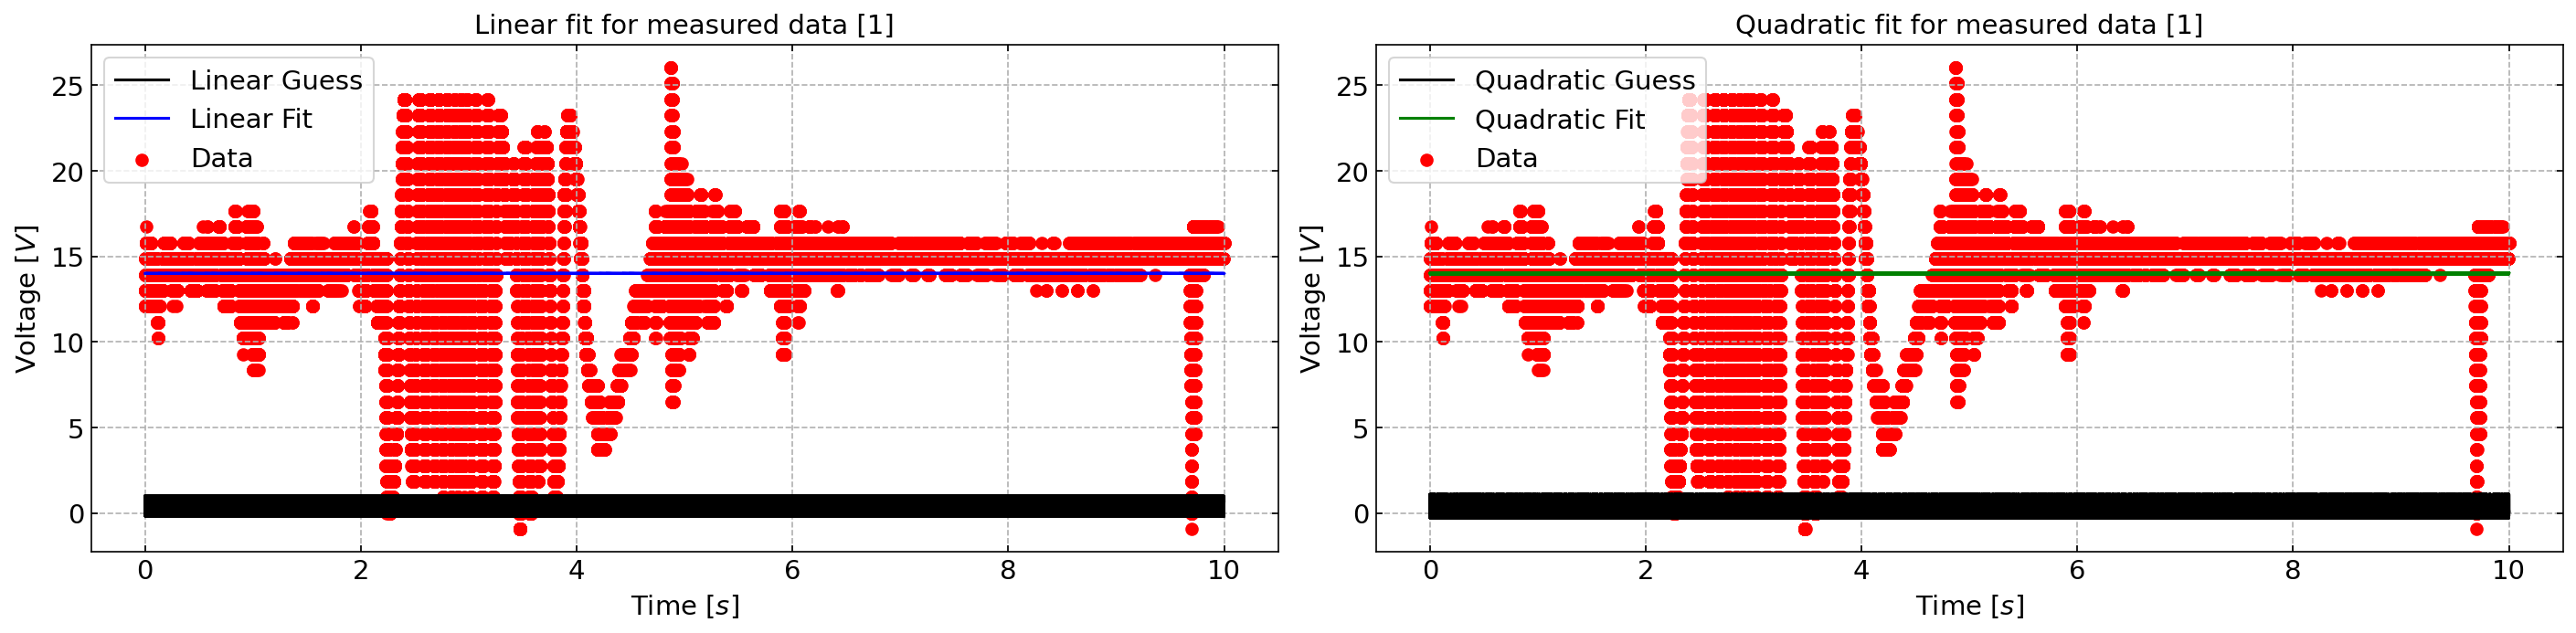

Linear Parameters:
Amplitude: -0.002006550896236339 $\pm$ 0.005208294981817565
n: 2.0169120793400088e-06 $\pm$ 3.4073004486314866e-07
Offset: 14.399649977326229 $\pm$ 0.003682847820879432

Quadratic Parameters:
Amplitude: -0.025909515115045398 +/- [0]
n: 2.102528542799119e-06 +/- 4.1848459759490814e-09
Offset: 14.399736095401384 +/- 0.0036829750331927556
m: 3.199511661112946e-08 +/- 1.8541717063968802e-08


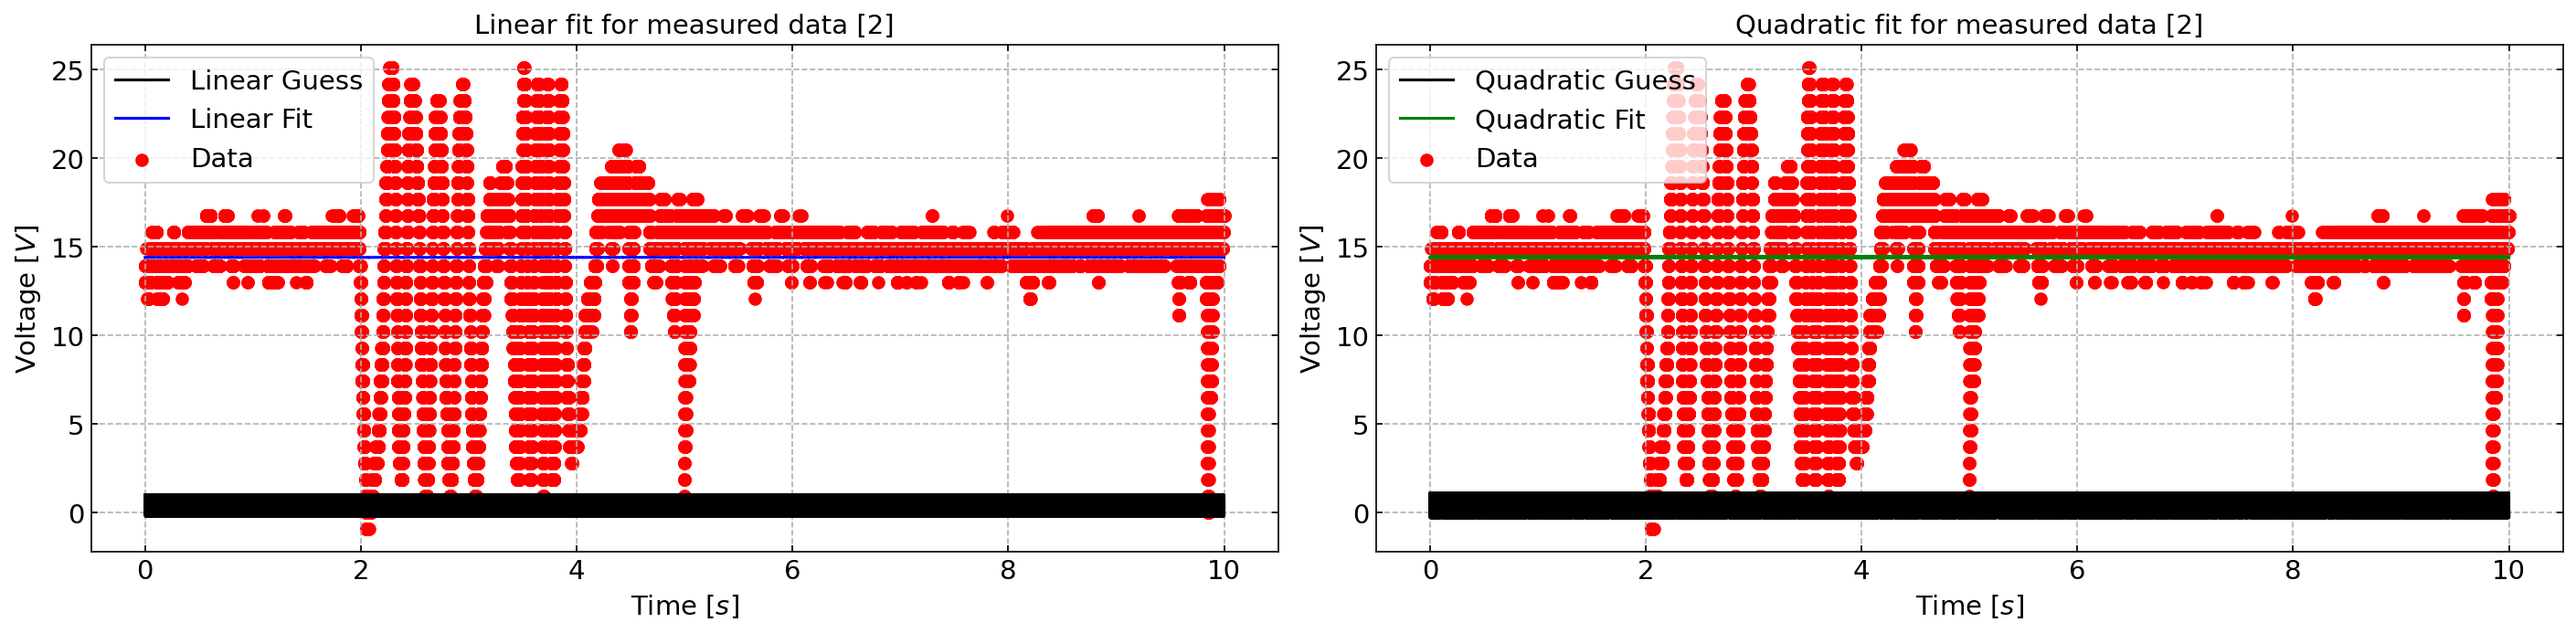

Linear Parameters:
Amplitude: 0.003915183646080927 $\pm$ 0.004658450534558649
n: 2.195893723032568e-06 $\pm$ 1.637385690925995e-07
Offset: 13.721902945253913 $\pm$ 0.0032940392240758147

Quadratic Parameters:
Amplitude: -0.06871437140417744 +/- [0]
n: 2.1142473774423674e-06 +/- 1.7211476888627355e-09
Offset: 13.72171317606512 +/- 0.0032940728382693063
m: 5.7085790985933e-08 +/- 1.0067582728929359e-08


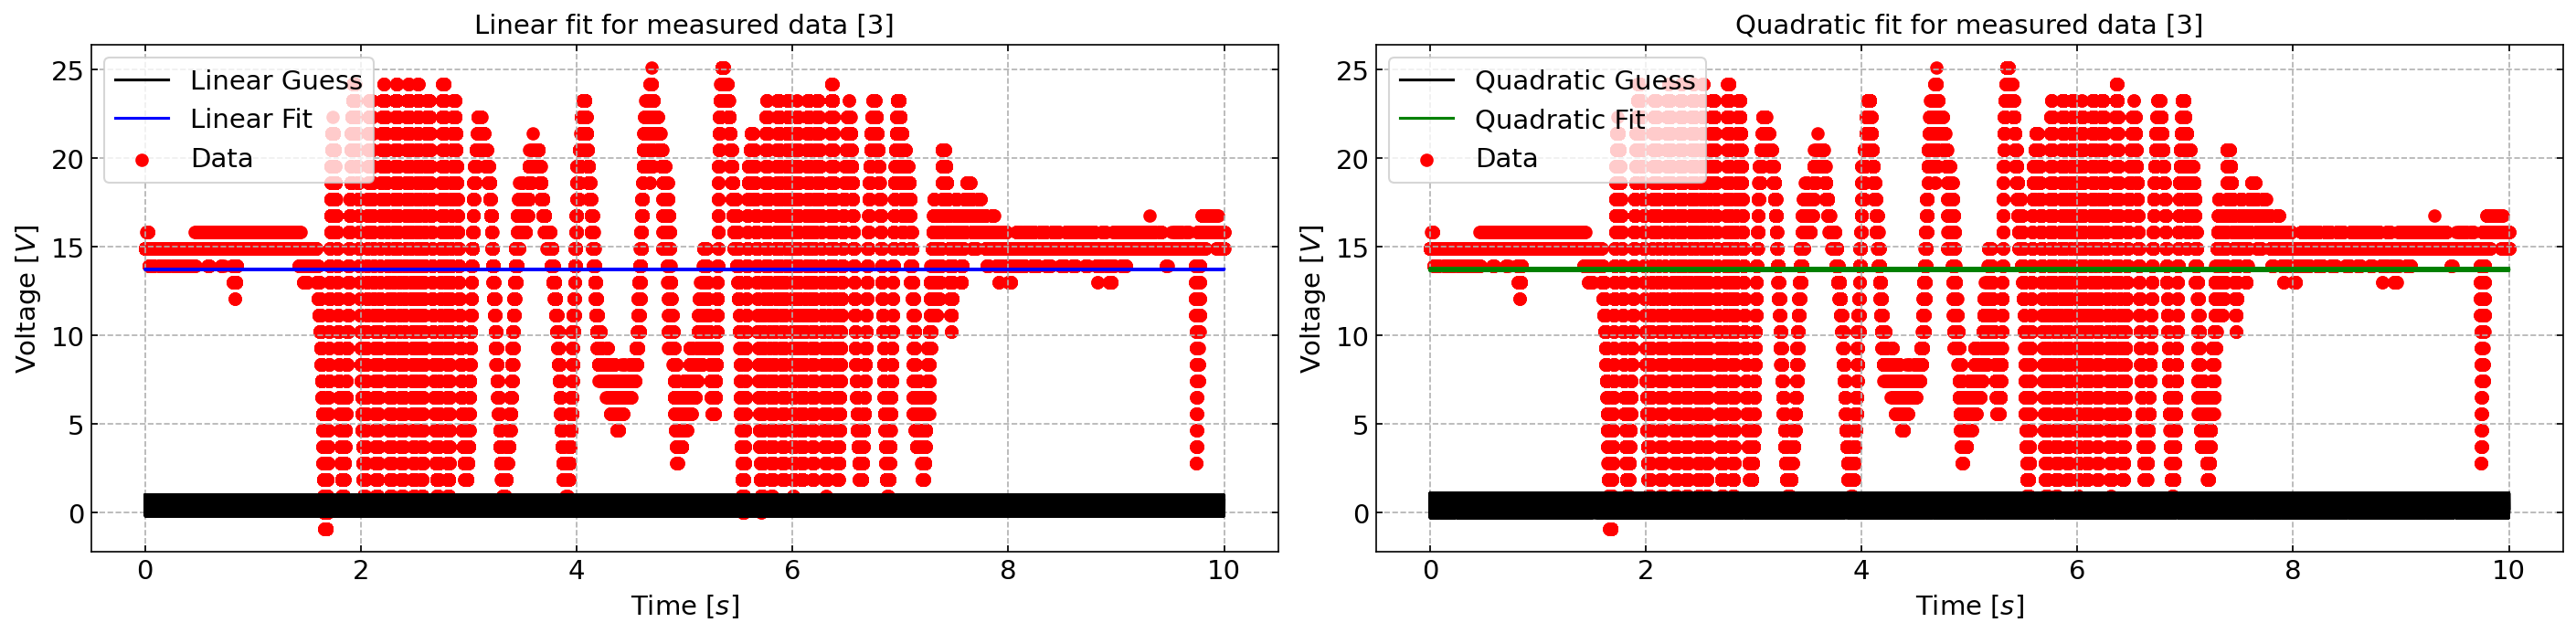

Linear Parameters:
Amplitude: 0.0013799512223917159 $\pm$ 0.004558280171990298
n: 2.089820668158838e-06 $\pm$ 4.4456636293270615e-07
Offset: 13.649128815467222 $\pm$ 0.003223191383526716

Quadratic Parameters:
Amplitude: -0.03157384747705716 +/- [0]
n: 2.095623007220778e-06 +/- 5.8548676304171816e-09
Offset: 13.649087233153276 +/- 0.0032232079952007734
m: 1.1545261827439303e-07 +/- 4.22176306361153e-08


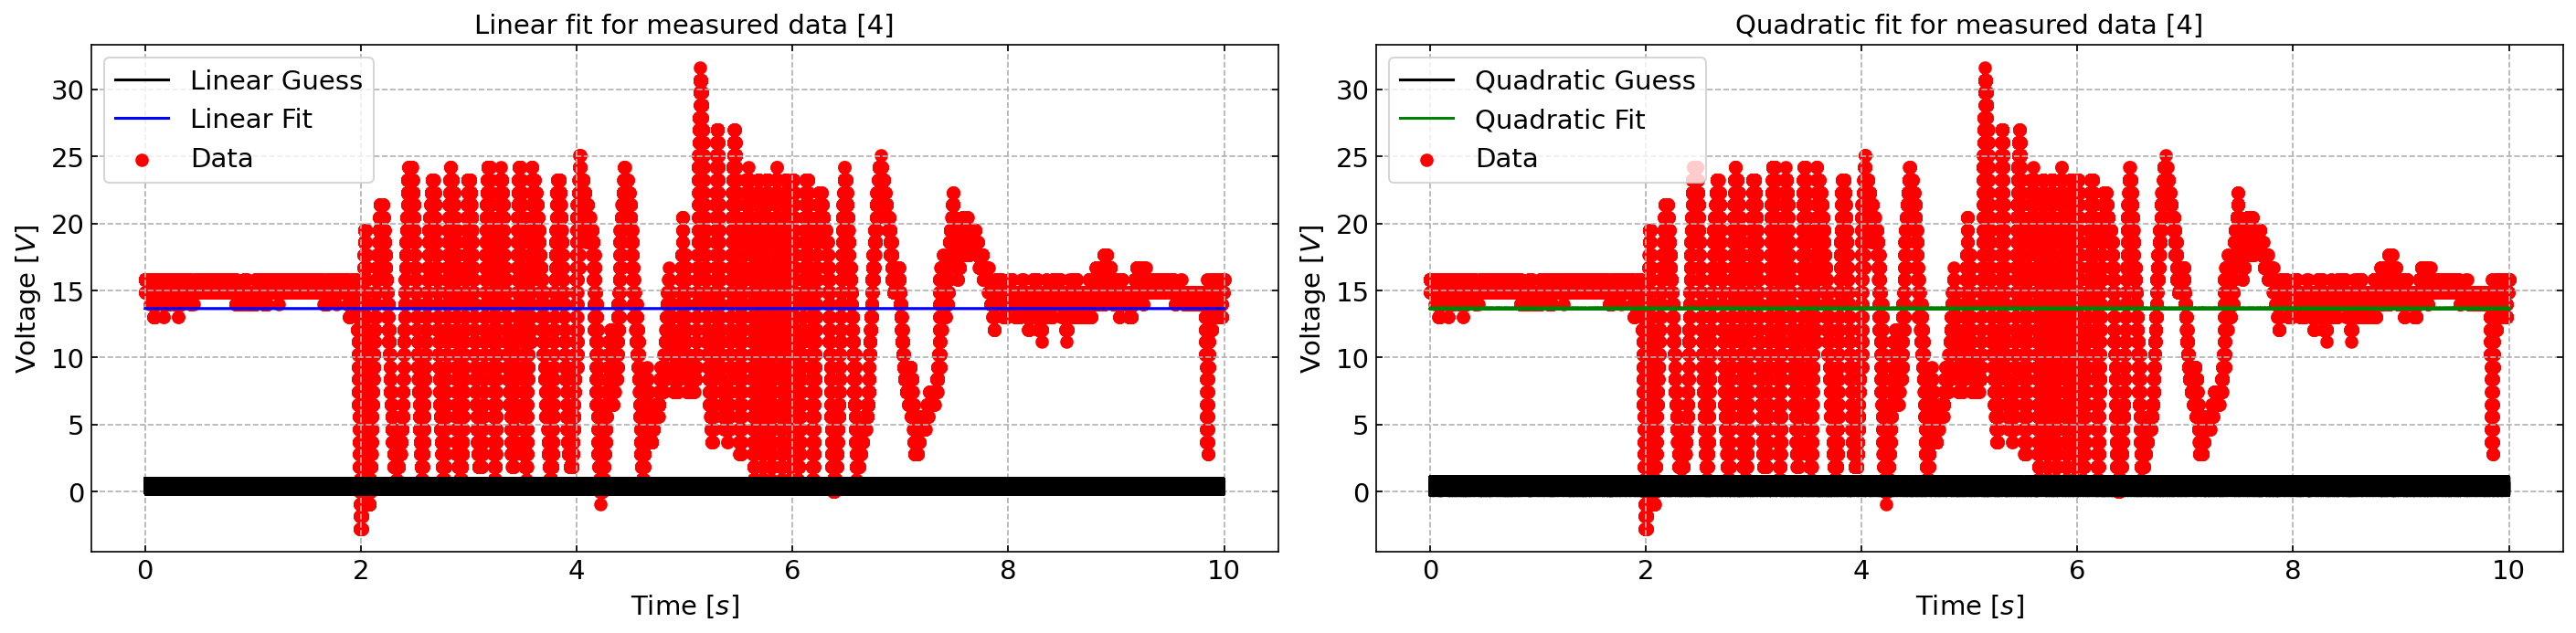

Linear Parameters:
Amplitude: -0.0018432845955638827 $\pm$ 0.005137461613952034
n: 2.546331323715397e-06 $\pm$ 3.639905784333803e-07
Offset: 14.117499057048773 $\pm$ 0.0036327386989187123

Quadratic Parameters:
Amplitude: -0.060590888294821774 +/- [0]
n: 2.133668114747685e-06 +/- 1.5705138964379855e-09
Offset: 14.117687694923587 +/- 0.003632824356375088
m: -1.2391075058578462e-08 +/- 4.350910382521156e-09


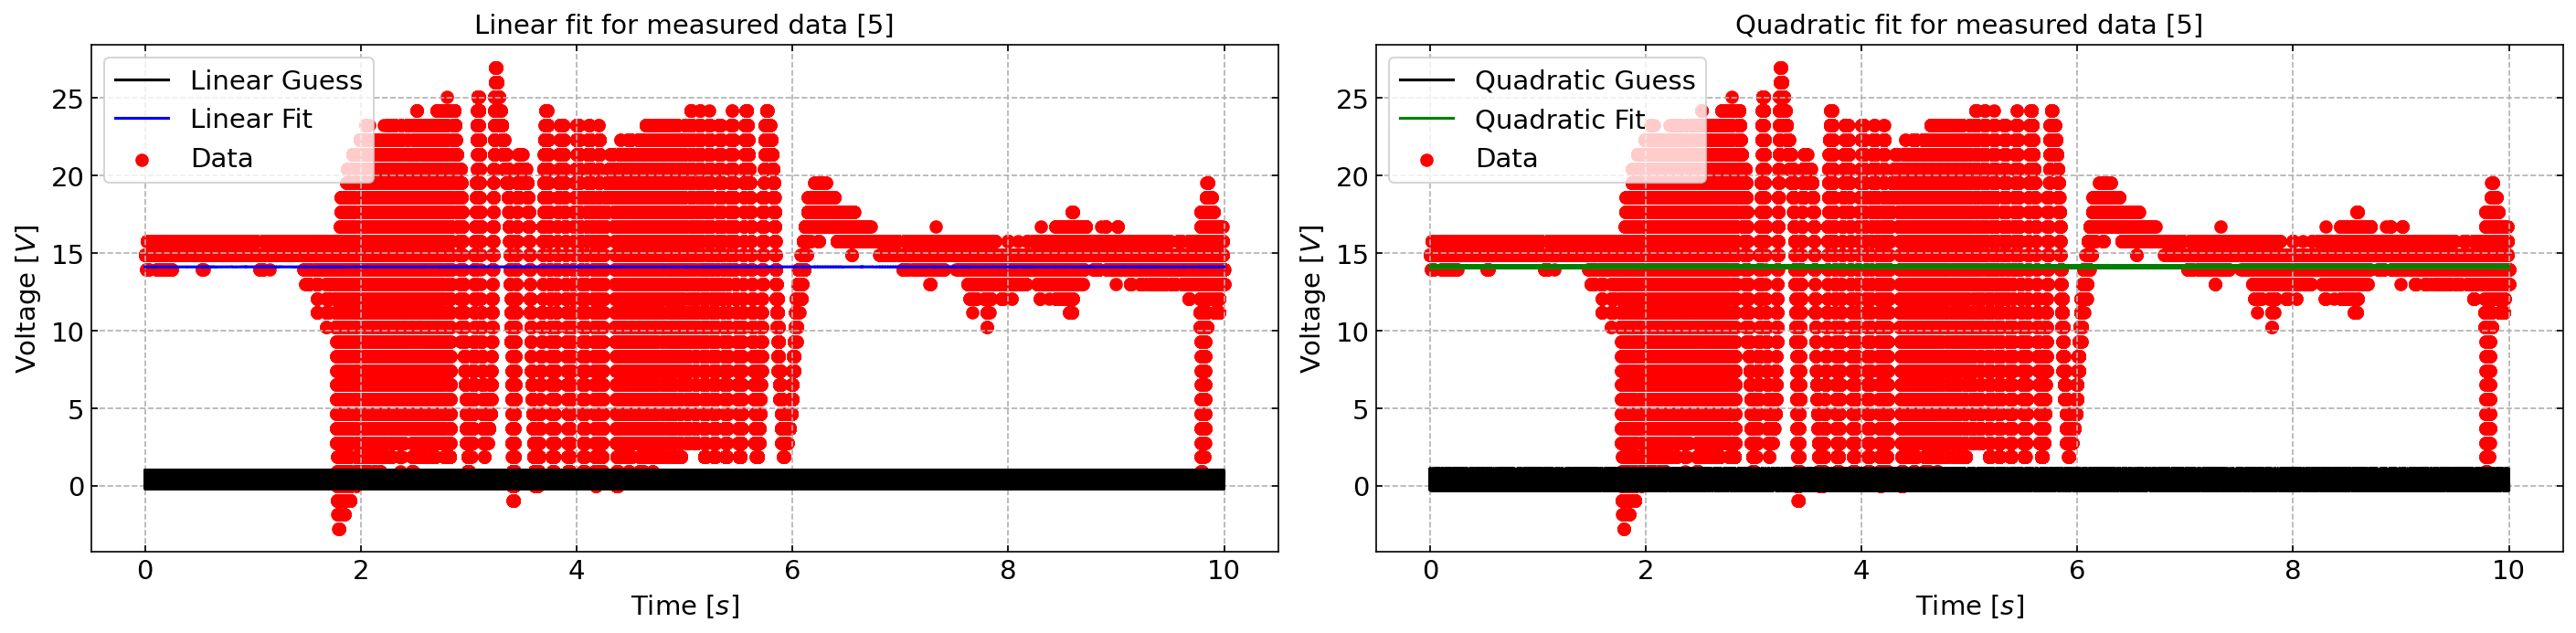

Linear Parameters:
Amplitude: 0.0005892981402266388 $\pm$ 0.004880471587435866
n: 2.182217433436963e-06 $\pm$ 1.1190425582972228e-06
Offset: 11.97847198131412 $\pm$ 0.0034509851980235495

Quadratic Parameters:
Amplitude: 0.050907528737263036 +/- [0]
n: 2.1046722632282955e-06 +/- 6.482289305099815e-09
Offset: 11.978676011755976 +/- 0.0034510501904437213
m: -7.960691772744031e-07 +/- 5.008215570698081e-08


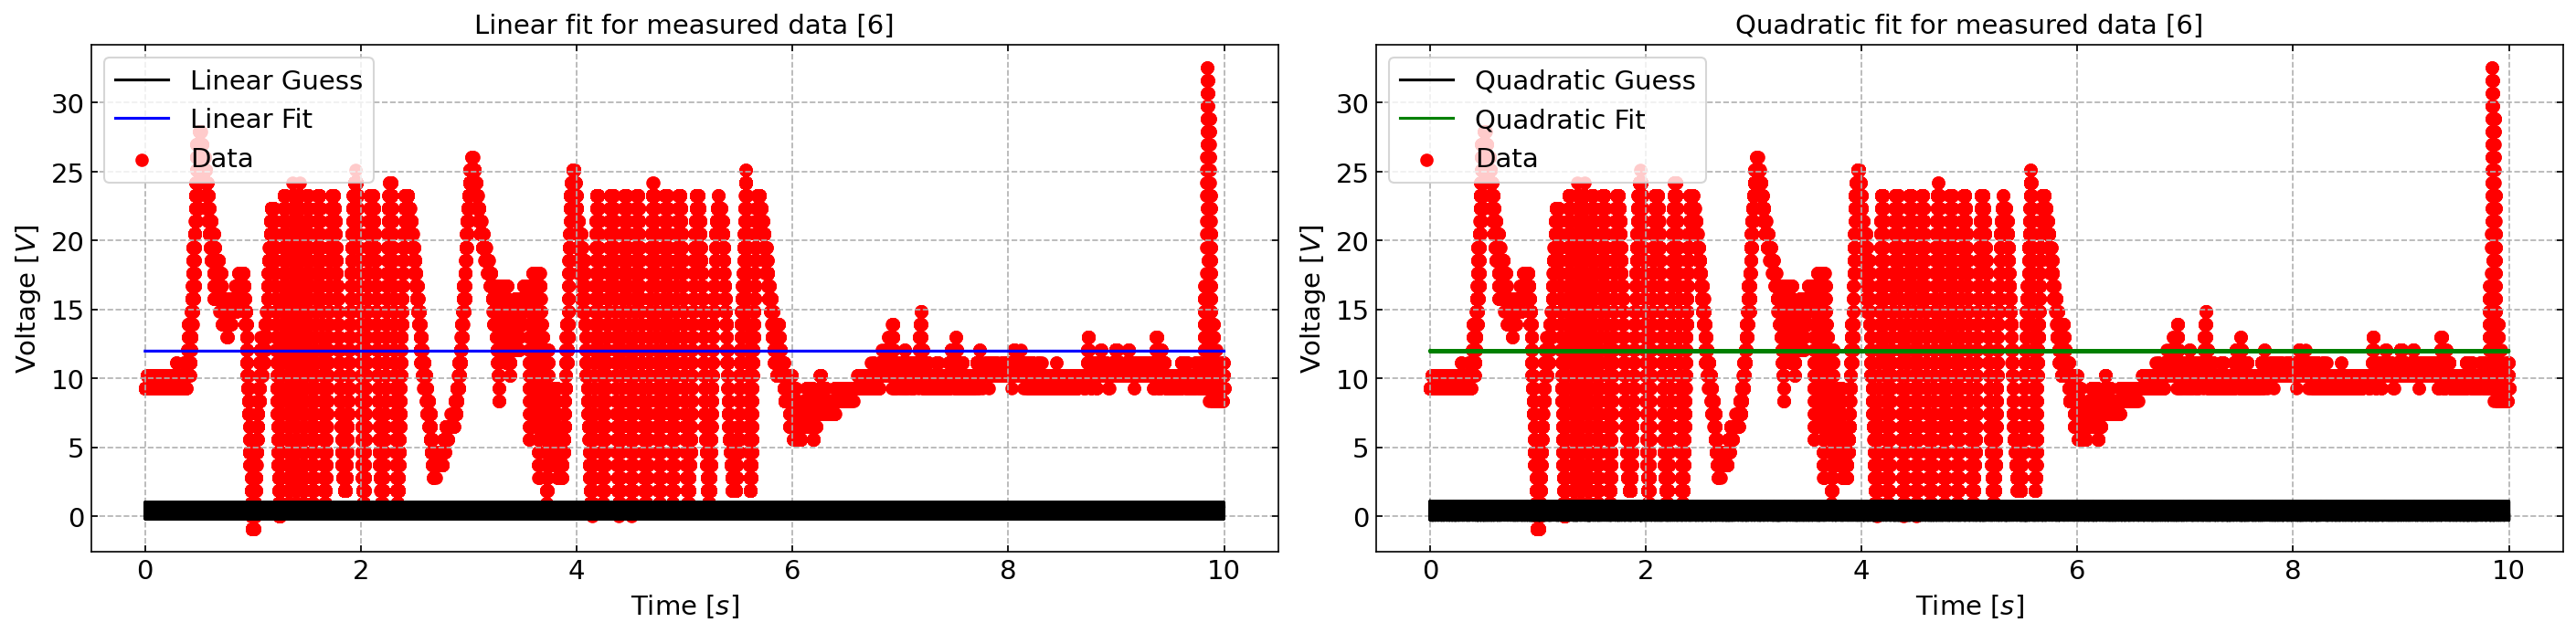

Linear Parameters:
Amplitude: -0.0003334391739973168 $\pm$ 0.0033829735783058707
n: 1.9573231992491665e-06 $\pm$ 1.3599729536259458e-06
Offset: 13.970861738234031 $\pm$ 0.0023921254512004678

Quadratic Parameters:
Amplitude: -0.0333386750069339 +/- [0]
n: 2.0964142221977416e-06 +/- 2.351541702965775e-09
Offset: 13.970883586133152 +/- 0.002392135076465516
m: -4.5765338610191294e-08 +/- 1.234575293878926e-08


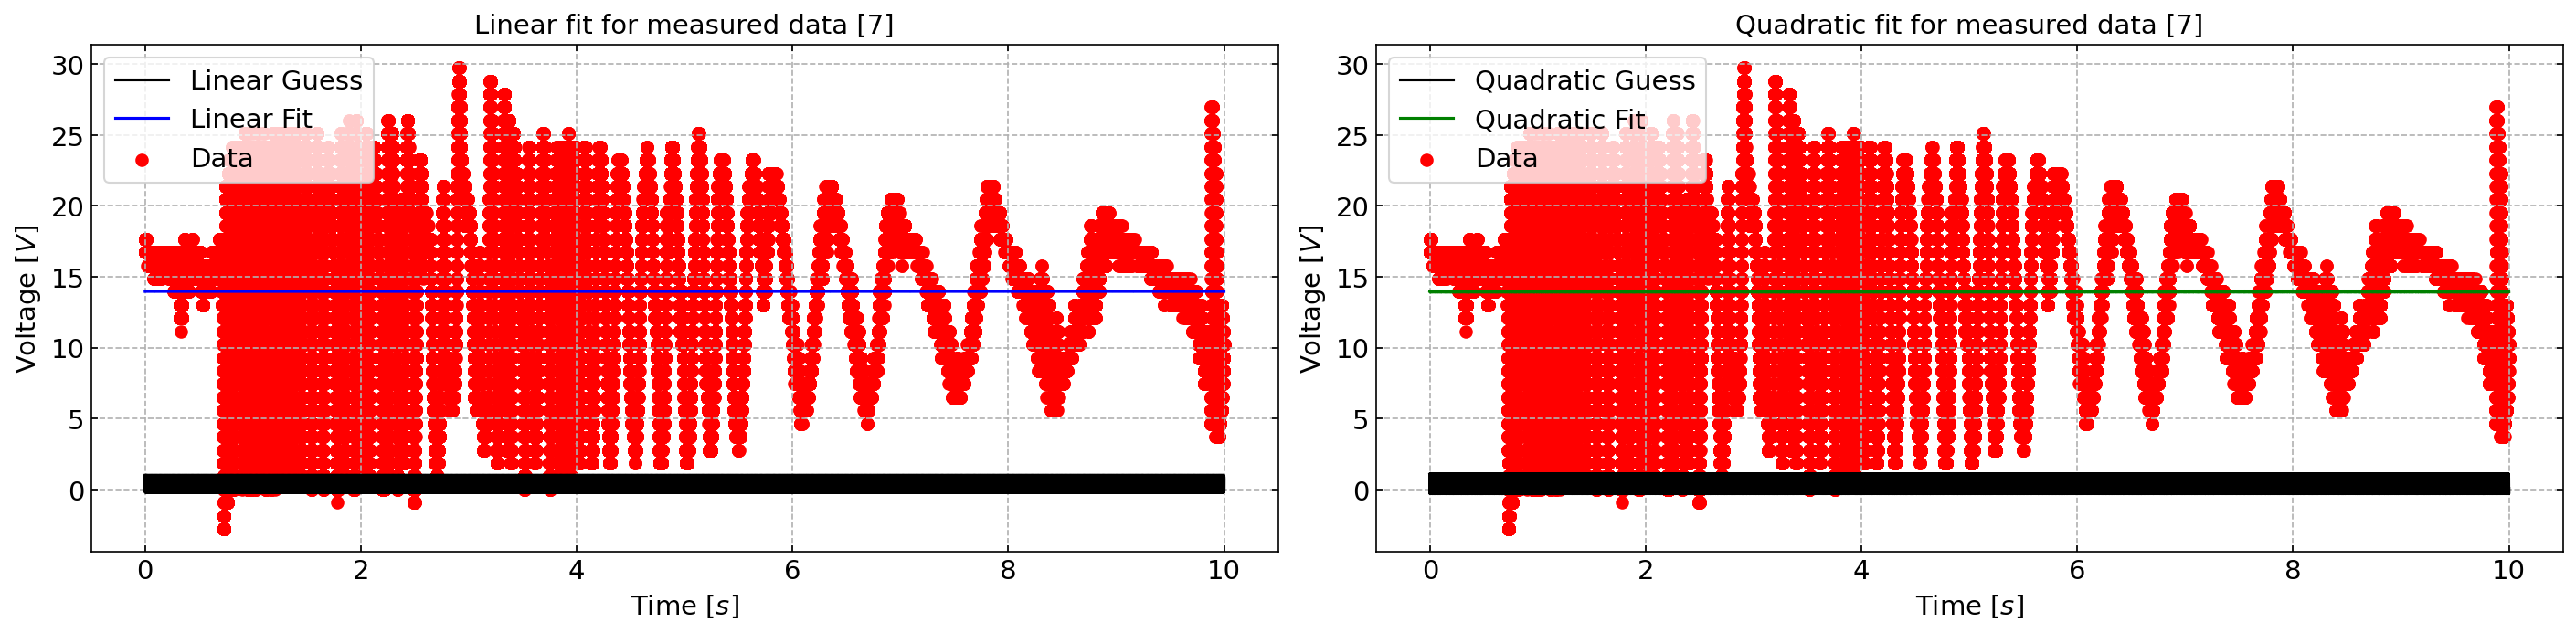

Linear Parameters:
Amplitude: 0.0008958137606538605 $\pm$ 0.0032610375558153014
n: 2.428912456961156e-06 $\pm$ 1.0878834667143115e-06
Offset: 14.004520755770018 $\pm$ 0.002305911031492838

Quadratic Parameters:
Amplitude: 0.03823942475317227 +/- [0]
n: 2.0109559288894503e-06 +/- 5.754227905284158e-09
Offset: 14.004643700627684 +/- 0.0023059492220744264
m: 7.870057858634192e-07 +/- 4.450685423762164e-08


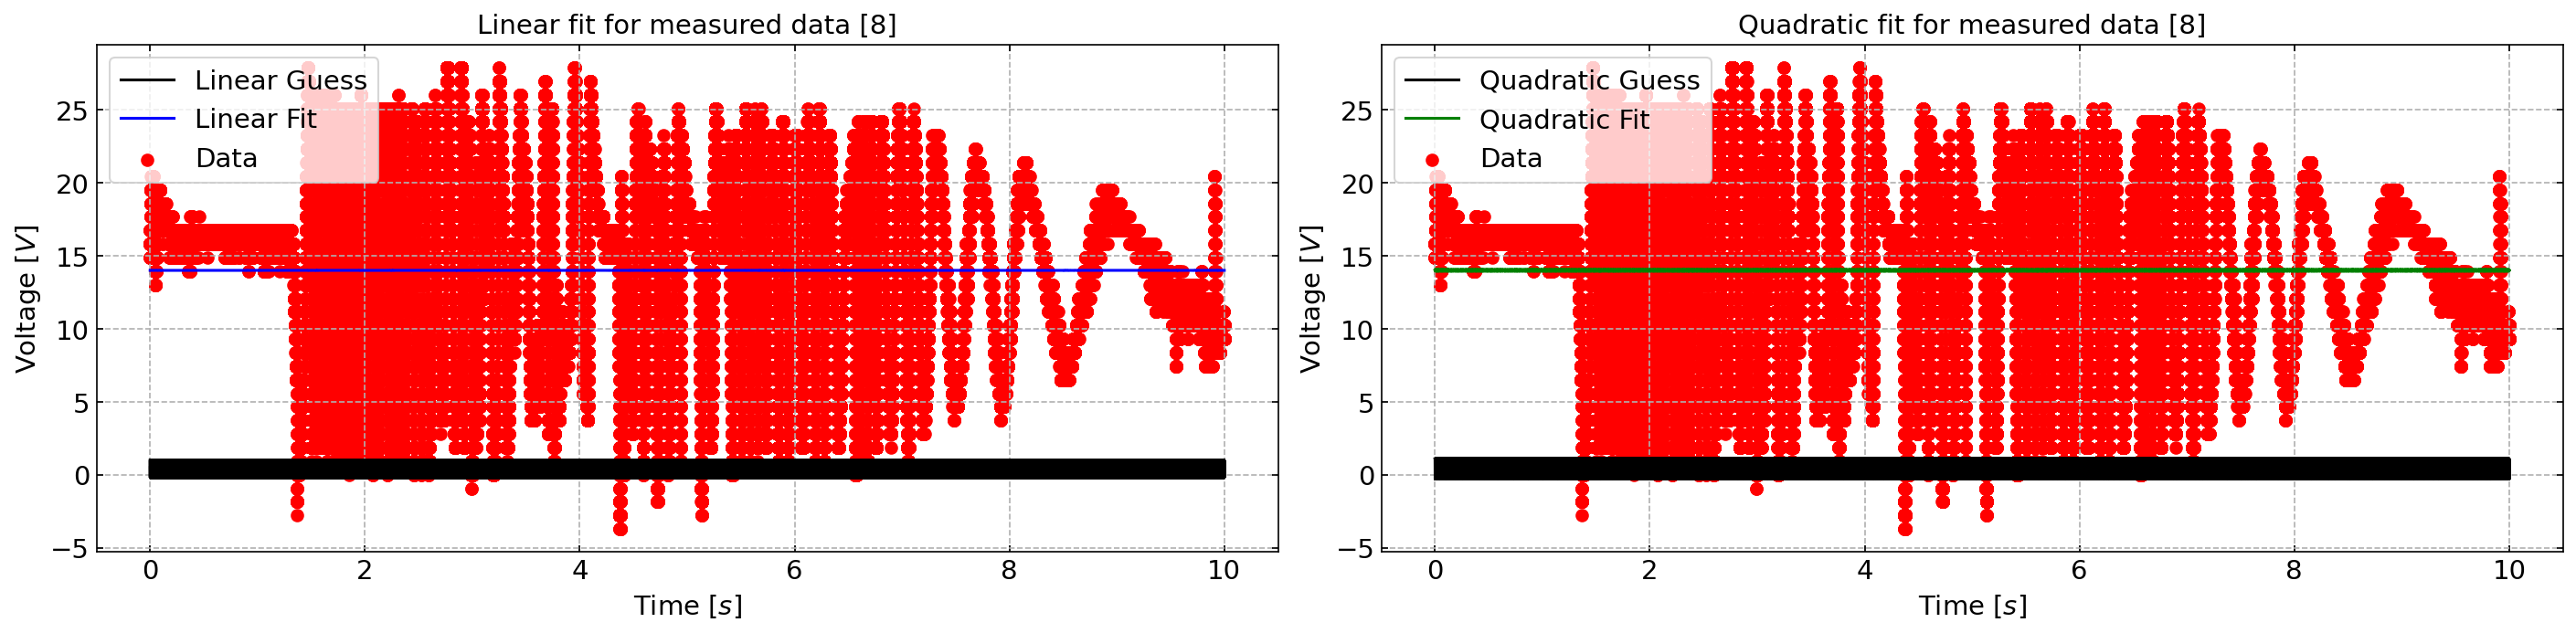

Linear Parameters:
Amplitude: 0.00031418826015328083 $\pm$ 0.004239680427267919
n: 2.0999328971975486e-06 $\pm$ 1.8156343139329353e-06
Offset: 13.785385587422125 $\pm$ 0.0029978842359701533

Quadratic Parameters:
Amplitude: 0.03198946268104084 +/- [0]
n: 2.0155804692799033e-06 +/- 2.3874353013298127e-09
Offset: 13.78532531244471 +/- 0.002997923556565566
m: 7.147582095402565e-09 +/- 5.035516136024631e-09


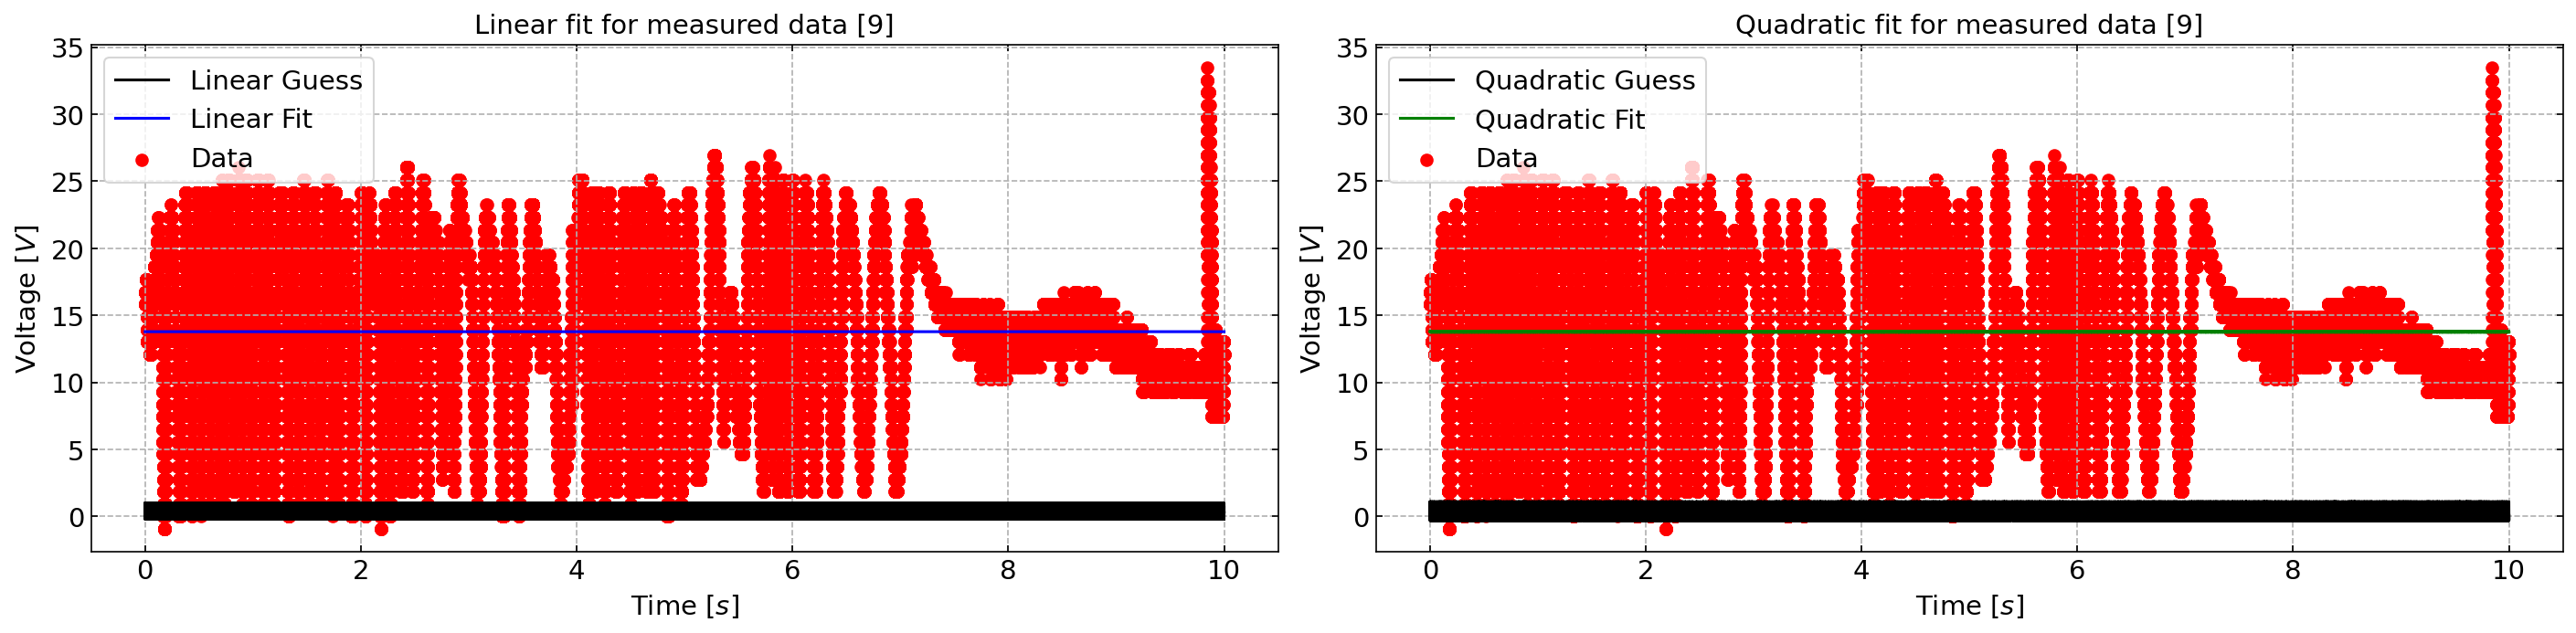

Linear Parameters:
Amplitude: -0.0027092452351091347 $\pm$ 0.0041453369107682814
n: 2.1256636256027795e-06 $\pm$ 2.0463550683619068e-07
Offset: 13.867344783112378 $\pm$ 0.0029312030015153467

Quadratic Parameters:
Amplitude: 0.04960958466505396 +/- [0]
n: 2.0116161919418374e-06 +/- 5.588175966600962e-09
Offset: 13.867362799275025 +/- 0.0029312771177329665
m: 7.17037957901973e-07 +/- 4.3174143546615715e-08


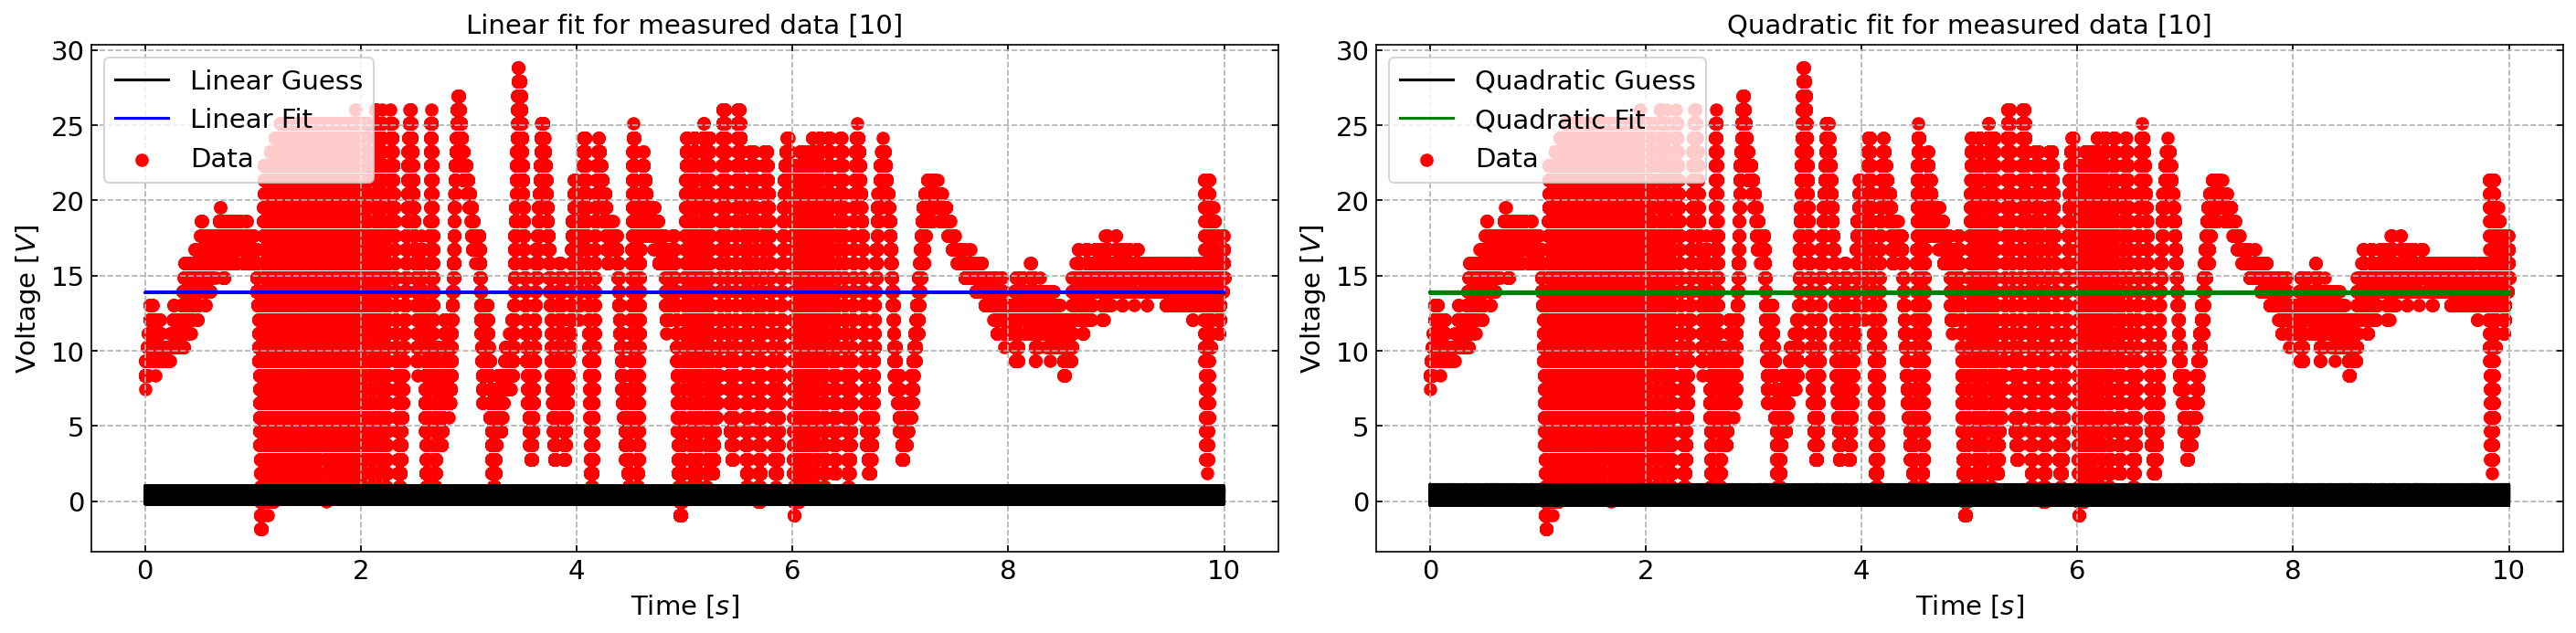

Linear Parameters:
Amplitude: 0.0009931534220098959 $\pm$ 0.0032090446534052686
n: 2.100000891731494e-06 $\pm$ 4.3478467333771134e-07
Offset: 13.530238588816955 $\pm$ 0.0022691435365846976

Quadratic Parameters:
Amplitude: -0.014795641808257055 +/- [0]
n: 2.0432609831684113e-06 +/- 1.4853607599531431e-08
Offset: 13.530248842185554 +/- 0.002269158755313352
m: 1.1101499135610368e-06 +/- 1.1476407998546881e-07


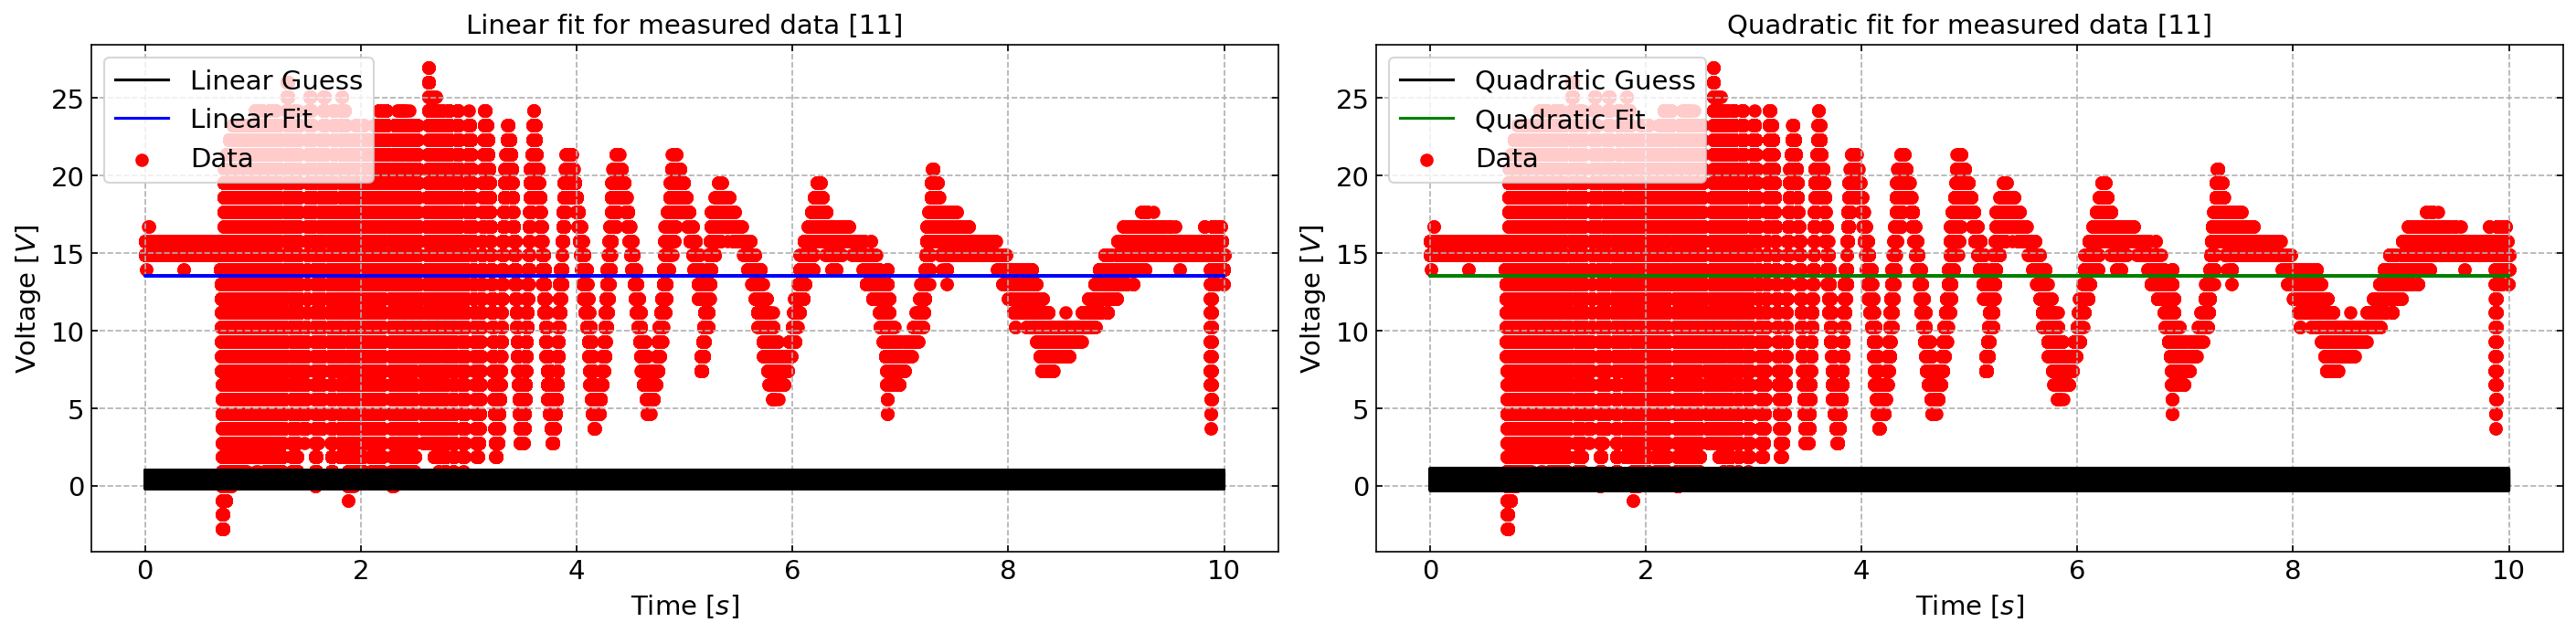

Linear Parameters:
Amplitude: -0.0002762102259723448 $\pm$ 0.0032261064841658522
n: 2.2056708895586484e-06 $\pm$ 1.5996244092106148e-06
Offset: 13.21075967649593 $\pm$ 0.002281203261483836

Quadratic Parameters:
Amplitude: 0.02093196920591254 +/- [0]
n: 2.1024207897103056e-06 +/- 3.5314045108594134e-09
Offset: 13.210739360502423 +/- 0.002281215393010132
m: -4.493661363792204e-08 +/- 1.851063387091112e-08


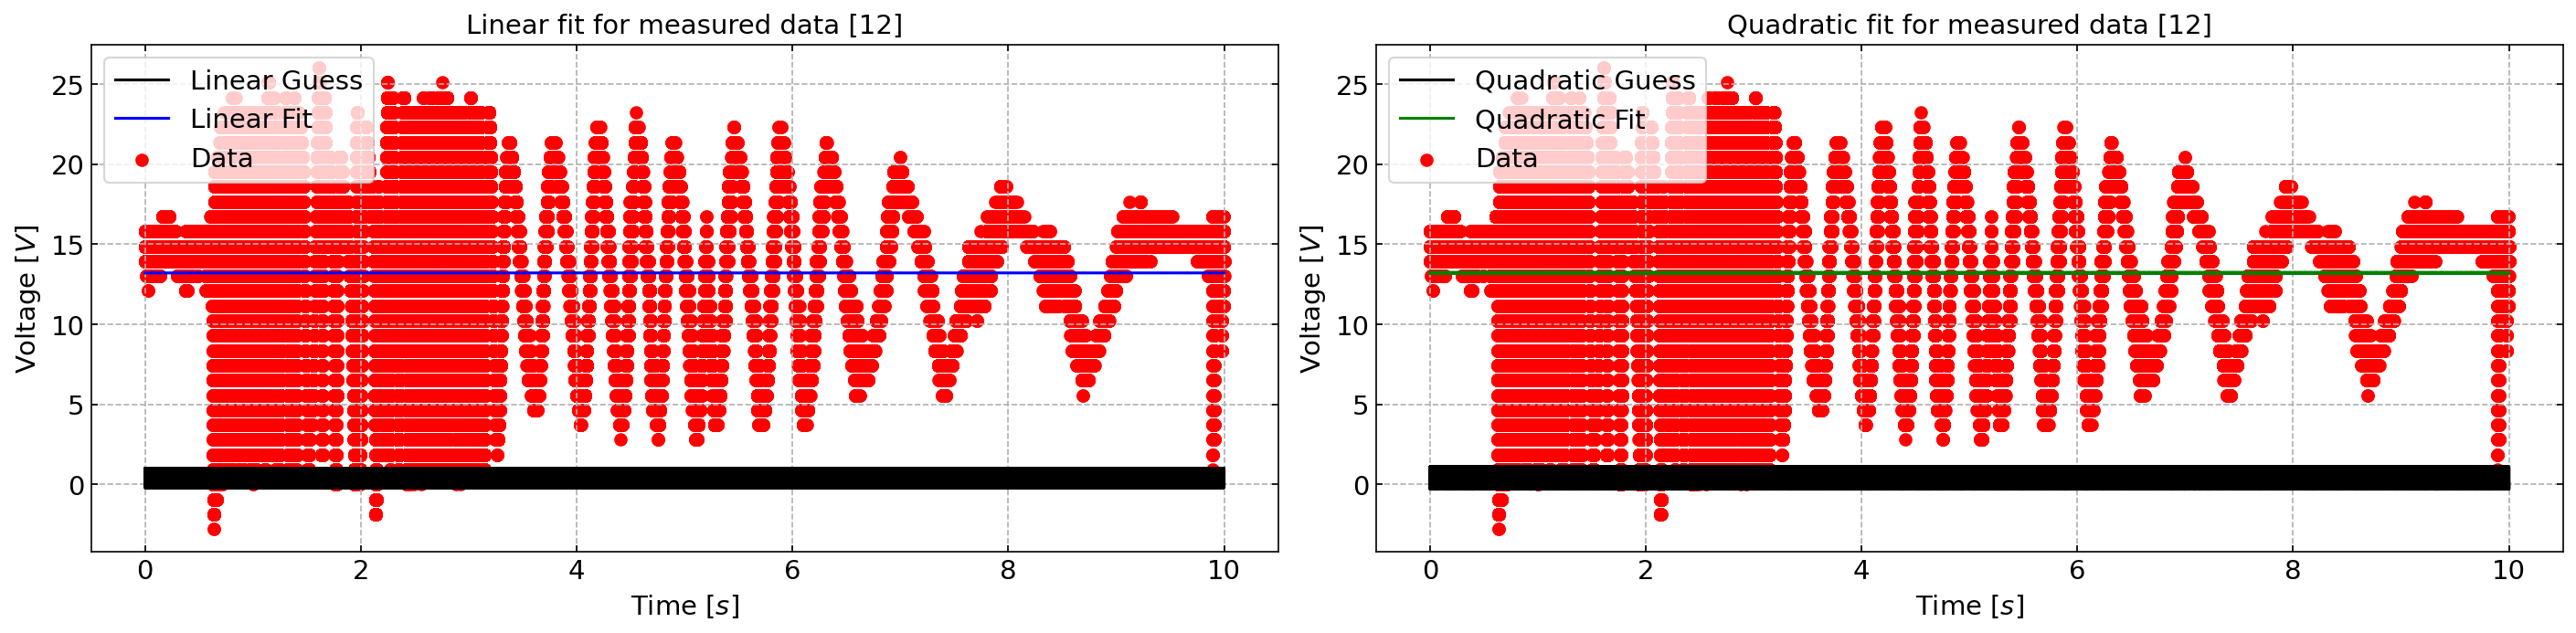

Linear Parameters:
Amplitude: -0.001276671077546843 $\pm$ 0.003926857905957101
n: 2.1453762786633678e-06 $\pm$ 4.1154901174692685e-07
Offset: 12.72664315118614 $\pm$ 0.002776706722020471

Quadratic Parameters:
Amplitude: 0.024782459734536546 +/- [0]
n: 2.104995026897524e-06 +/- 2.9878055315906352e-09
Offset: 12.7266860709212 +/- 0.002776746949488547
m: 1.621271359504105e-08 +/- 9.489664963898733e-09


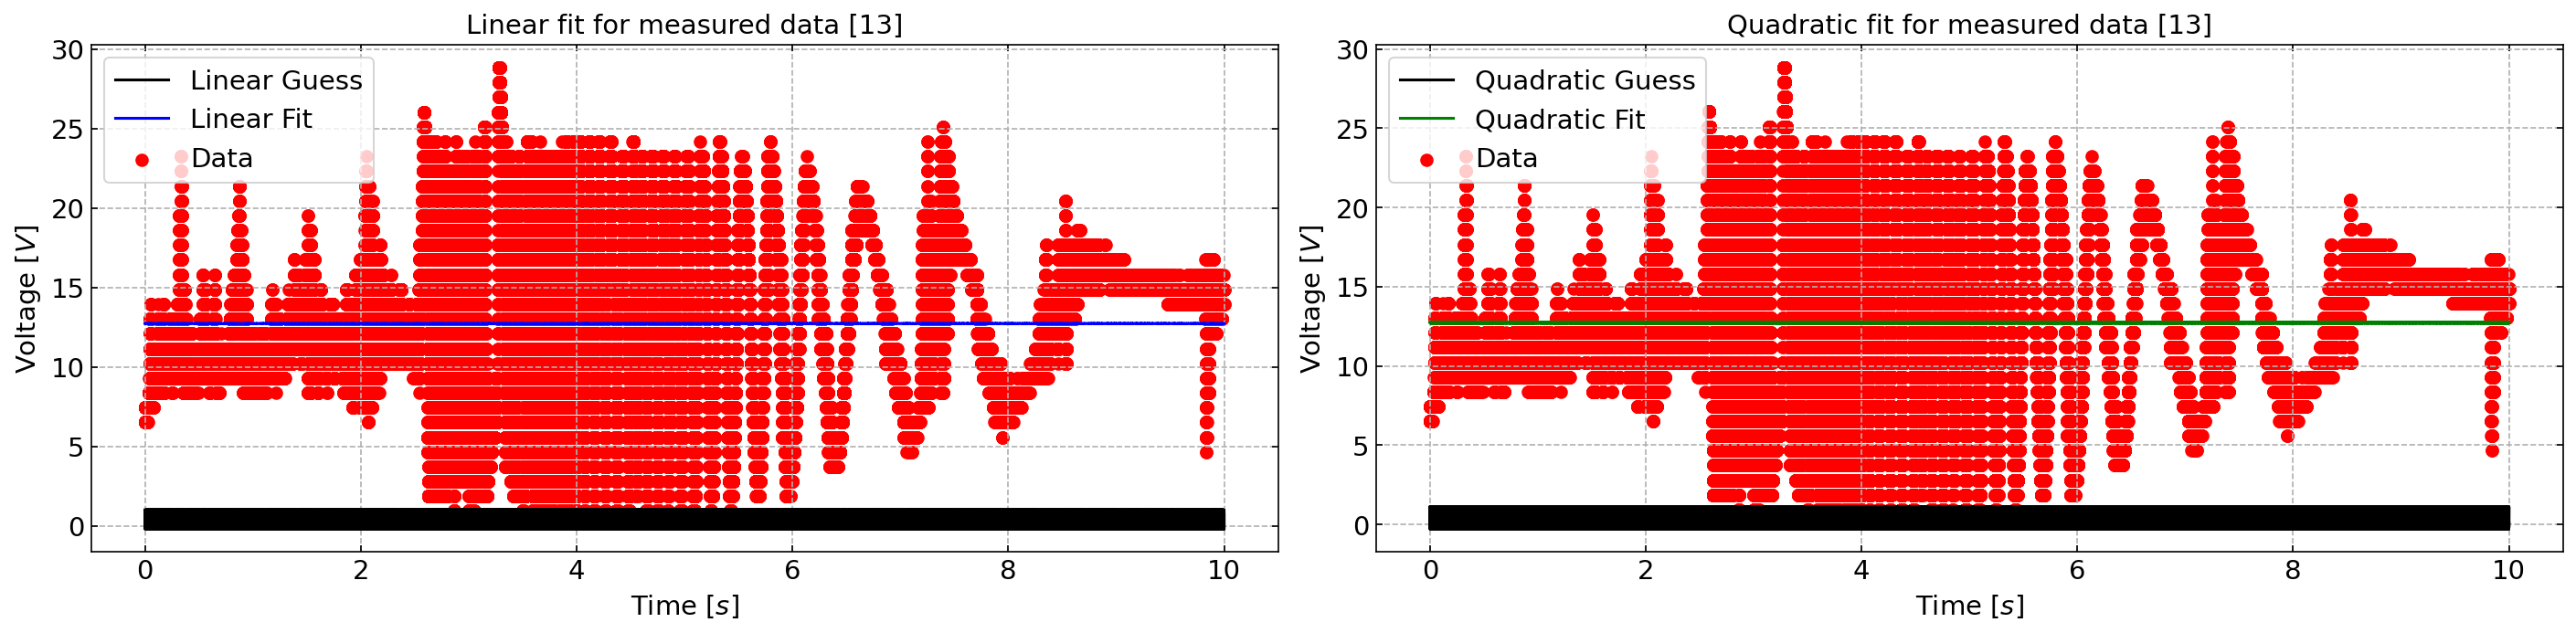

In [15]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

#Here is my loop where i plot for curve fits with different powers.
for i in range(len(time)):
    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i], V1[i], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for measured data {[i+1]}')
    plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='black')  # Plot linear fit
    plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls = '--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i], V1[i], p0=p0_Quad, absolute_sigma=True)
    #calc standard deviation of the fitted parameters
    quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='black')  # Plot quadratic fit
    plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls = '--')
    plt.tight_layout()
    
    #Print statements to get the fitted parameters
    print("Linear Parameters:")
    print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    print("n:", popt_1[1], '$\pm$', lin_err[1])
    lin_const.append(popt_1[1])
    lin_sigma.append(lin_err[1])
    print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    print("Amplitude:", popt_2[0], "+/-", [0])
    print("n:", popt_2[1], "+/-", quad_err[1])
    print("Offset:", popt_2[2], "+/-", quad_err[2])
    print("m:", popt_2[3], "+/-", quad_err[3])
    plt.show()